<a href="https://colab.research.google.com/github/BrunaMoraisMenezesDSM/atividade_guiada_05_10/blob/master/Atividade_Guiada_Bruna_Morais_Menezes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Guiada do dia 05/10/2024

**Nome:** Bruna Morais Menezes **| RA:** 1131392213017

**Objetivo:** Realizar uma análise de dados em quatro etapas principais: busca por uma base de dados, limpeza e estruturação dos dados, visualização e conclusões a partir dos dados observados.

## Encontrando uma Base de Dados

Kaggle: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

## Limpeza e Estruturação dos Dados
Nesta etapa, vamos importar e realizar a limpeza dos dados, para que assim possamos fazer a análise

---

Importanto o dataset para o Google Colab e visualizando as primeiras linhas


In [28]:
# Importando a biblioteca pandas
import pandas as pd

# Subindo o arquivo CSV no Colab
from google.colab import files
uploadead = files.upload()

# Lendo o dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Exibindo as cinco primeiras linhas do DataFrame
df.head()

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors (1).csv


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Exploração dos dados

Verificando abaixo a presença de valores nulos, mostrando a quantidade existente em cada coluna.

In [29]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


### Tratamento dos dados faltantes

Baseado no resultado acima, todos os campos que possuem valores nulos são categóricos, sendo assim, vamos substituir por um valor padrão.

In [30]:
df['Teacher_Quality'].fillna('Desconhecido', inplace = True)
df['Physical_Activity'].fillna('Desconhecido', inplace = True)
df['Parental_Education_Level'].fillna('Desconhecido', inplace = True)
df['Distance_from_Home'].fillna('Desconhecido', inplace = True)

<ipython-input-30-66a606a8fb0c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna('Desconhecido', inplace = True)
<ipython-input-30-66a606a8fb0c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Validando se após o tratamento acima as colunas não possuem mais valores nulos.

In [31]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


### Conversão de tipos de dados

Precisamos assegurar de que os tipos de dados estão corretos, para isso, abaixo vamos realizar uma conversão de tipos de dados em todos os campos.

In [32]:
# Variáveis Categóricas
df['Parental_Involvement'] = df['Parental_Involvement'].astype('category')
df['Access_to_Resources'] = df['Access_to_Resources'].astype('category')
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].astype('category')
df['Motivation_Level'] = df['Motivation_Level'].astype('category')
df['Internet_Access'] = df['Internet_Access'].astype('category')
df['Family_Income'] = df['Family_Income'].astype('category')
df['Teacher_Quality'] = df['Teacher_Quality'].astype('category')
df['School_Type'] = df['School_Type'].astype('category')
df['Peer_Influence'] = df['Peer_Influence'].astype('category')
df['Learning_Disabilities'] = df['Learning_Disabilities'].astype('category')
df['Parental_Education_Level'] = df['Parental_Education_Level'].astype('category')
df['Distance_from_Home'] = df['Distance_from_Home'].astype('category')
df['Gender'] = df['Gender'].astype('category')

# Variáveis Numéricas
df['Hours_Studied'] = pd.to_numeric(df['Hours_Studied'], errors='coerce')
df['Attendance'] = pd.to_numeric(df['Attendance'], errors='coerce')
df['Sleep_Hours'] = pd.to_numeric(df['Sleep_Hours'], errors='coerce')
df['Previous_Scores'] = pd.to_numeric(df['Previous_Scores'], errors='coerce')
df['Tutoring_Sessions'] = pd.to_numeric(df['Tutoring_Sessions'], errors='coerce')
df['Physical_Activity'] = pd.to_numeric(df['Physical_Activity'], errors='coerce')
df['Exam_Score'] = pd.to_numeric(df['Exam_Score'], errors='coerce')

### Exploração estatística dos dados

Abaixo vamos usar o comando `describe` para gerar estatísticas descritivas de variáveis numéricas em um DataFrame.

In [33]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Para variavéis categóricas, vamos usar o `value_counts()` para calcular a frequência de cada valor do DataFrame.

In [34]:
print("\n", df['Parental_Involvement'].value_counts())
print("\n", df['Access_to_Resources'].value_counts())
print("\n", df['Extracurricular_Activities'].value_counts())
print("\n", df['Motivation_Level'].value_counts())
print("\n", df['Internet_Access'].value_counts())
print("\n", df['Family_Income'].value_counts())
print("\n", df['Teacher_Quality'].value_counts())
print("\n", df['School_Type'].value_counts())
print("\n", df['Peer_Influence'].value_counts())
print("\n", df['Learning_Disabilities'].value_counts())
print("\n", df['Parental_Education_Level'].value_counts())
print("\n", df['Distance_from_Home'].value_counts())
print("\n", df['Gender'].value_counts())


 Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

 Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

 Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

 Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

 Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

 Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

 Teacher_Quality
Medium          3925
High            1947
Low              657
Desconhecido      78
Name: count, dtype: int64

 School_Type
Public     4598
Private    2009
Name: count, dtype: int64

 Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64

 Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64

 Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Desconhecido      90
Name: coun

## Criação de Gráficos

Depois dos dados limpos e estruturados, podemos criar gráficos para entender a distribuição e padrões nas variáveis numéricas e categóricas.


---

**Gráficos para variáveis numéricas**

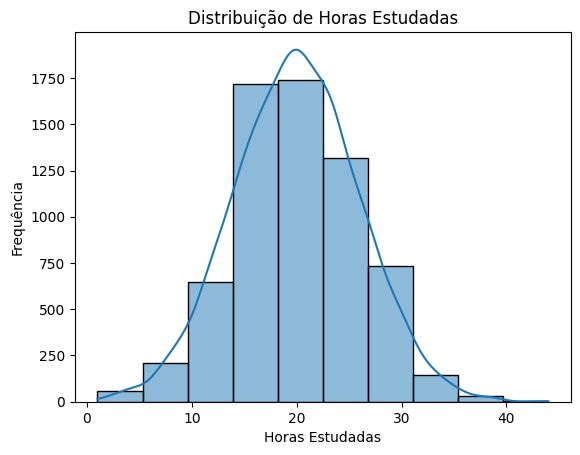

In [35]:
# Importando as bibliotecas Matplotlib e Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Criando histograma para a variável 'Hours_Studied'
sns.histplot(df['Hours_Studied'], bins = 10, kde = True)
plt.title('Distribuição de Horas Estudadas')
plt.xlabel('Horas Estudadas')
plt.ylabel('Frequência')
plt.show()

Observando o histograma acima, entende-se que a maioria dos alunos tem um comportamento parecido quando se trata de horas de estudo, porém ainda possuem alguns que se destacam por estudar muito mais ou muito menos. Podemos analisar isso no gráfico em que a distribuição possui mais simetria no lado direito, indicando que os discentes que estudam mais do que a maioria.

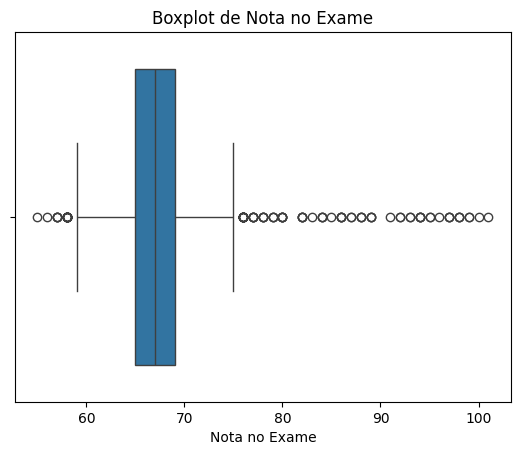

In [36]:
# Criando o boxplot para a variável 'Exam_Score'
sns.boxplot(x = df['Exam_Score'])
plt.title('Boxplot de Nota no Exame')
plt.xlabel('Nota no Exame')
plt.show()

Sobre o gráfico acima, a maioria dos alunos possuem desempenhos similares, com poucos alunos tirando notas muito baixas ou muito altas.

**Gráficos para variáveis categóricas**

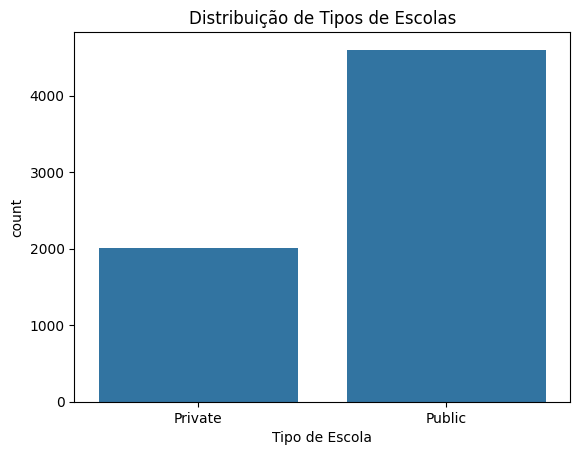

In [37]:
# Criando o gráfico de barras para a variável 'School_Type'
sns.countplot(x = 'School_Type', data = df)
plt.title('Distribuição de Tipos de Escolas')
plt.xlabel('Tipo de Escola')
plt.show()

Analisando o gráfico acima, é notável que há mais estudantes em escolas públicas do que em escolas privadas. A quantidade de alunos em escolas públicas é mais que o dobro da quantidade em escolas privadas.

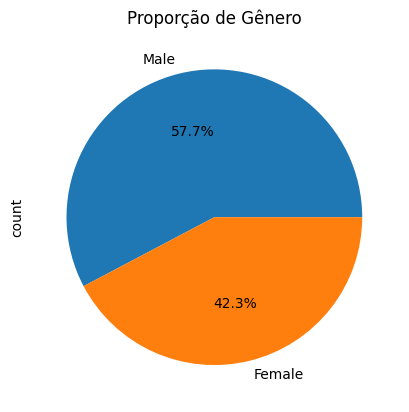

In [38]:
# Criando o gráfico de pizza para a variável 'Gender'
df['Gender'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Proporção de Gênero')
plt.show()

No gráfico acima a distribuição mostra que a maioria dos estudantes no dataset são do gênero masculino, representando 57,7% do total, enquanto as estudantes do gênero feminino representam 42,3%.

**Gráficos relacionais**

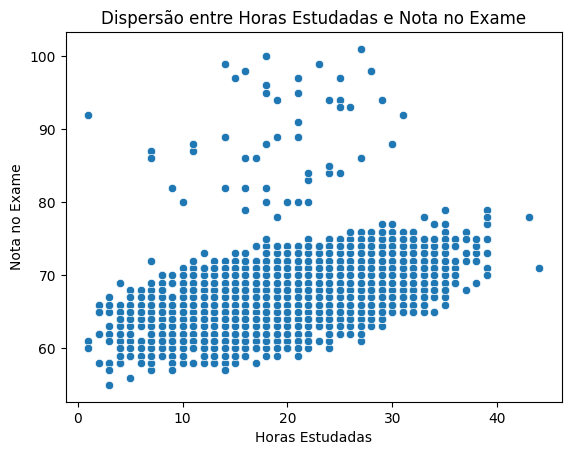

In [39]:
# Criando o gráfico de dispersão entre 'Hours_Studied' e 'Exam_Score'
sns.scatterplot(x = 'Hours_Studied', y = 'Exam_Score', data = df)
plt.title('Dispersão entre Horas Estudadas e Nota no Exame')
plt.xlabel('Horas Estudadas')
plt.ylabel('Nota no Exame')
plt.show()

Sobre a correlação entre as variáveis Hours_Studied e Exam_Score, entende-se que há uma tendência na qual à medida de que as horas de estudo aumentam, a nota do exame também aumenta, mas também é possível notar que essa relação não é perfeita, pois os pontos mais acima mostram que alguns alunos, mesmo com poucas horas de estudo conseguem notas mais altas, isso pode estar relacionado à outros fatores.





---


## **Conclusão dos Dados Observados**

Após a exploração dos dados e a criação de gráficos, é hora de analisar os
insights obtidos.

#### **1. Quais padrões você observou nas variáveis numéricas? (exemplo: distribuição normal, outliers)**
**Resposta:** Referente ao primeiro gráfico, o histograma utilizando a variável Hours_Studied tem uma distribuição centralizada, possui mais simetria do lado direito, que indica que a maioria dos alunos tem um comportamento parecido, mas alguns estudam muito mais ou muito menos. O boxplot sobre notas no exame (Exam_Score), mostra que desempenhos similares, mas é possível ver outliers à direita, que representam os desempenhos mais altos.


#### **2. Como estão distribuídas as variáveis categóricas? Alguma categoria se destaca em termos de frequência?**
**Resposta:** Pode-se observar que as variáveis categóricas revelam que a maioria dos estudantes no dataset frequenta escolas públicas, a quantidade de alunos em escolas públicas é mais que o dobro da quantidade em escolas privadas. Quanto ao gênero, há mais estudantes do gênero masculino, sendo 57,7%  em comparação com o feminino com 42,3%, estes dados podem estar relacionado à questões no contexto do dataset.


#### **3. Você identificou correlações entre variáveis numéricas? Qual pode ser a relação entre essas variáveis?**
**Resposta:** Sim, foi feito uma análise em cima do gráfico de dispersão entre os campos horas estudadas (Hours_Studied) e nota no exame (Exam_Score), indicou qua geralmente, quanto mais horas de estudo, melhor a nota no exame, mas não é uma relação perfeita, é possível notar através dos pontos espalhados mais acima que outros fatores podem influenciar nas notas também.


#### **4. Com base nos dados, quais são as principais conclusões que você pode tirar? O que essas conclusões indicam para o contexto do dataset escolhido?**
**Resposta:** Baseado nas análises, é possível entender que dedicar mais tempo aos estudos, pode estar relacionado a um melhor desempenho nos exames, mas que há outros fatores para ter uma boa performance. Também foi possível perceber que pessoas do gênero masculino e de escola pública são predominantes neste avaliação.